<a href="https://colab.research.google.com/github/shubh1357/Gigit-Recognizer/blob/master/digitrec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install keras
from keras.datasets import mnist
mnist.load_data()

import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_LOG_LEVEL']='3'

#keras imports for the dataset and building our neural network

from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

#Now load dataset using following function which will split the data into train and test sets
(X_train, y_train),(X_test, y_test)=mnist.load_data()

#inspecting image
fig=plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i],cmap='gray',interpolation='none')
  plt.title("Digit:{}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
  
fig


# unrooling height x width pixel format into one big vector
fig=plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0],cmap='gray',interpolation='none')
plt.title("Digit:{}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig


# normalizing input data for speeding up the training process, it can also reduce the chances of getting stuck in local optima, since we r using stochastic
# gradient descent to find the optimal weights for the network.
# printing shapes before reshaping and normalizing
print("X_train_shape", X_train.shape)
print("y_train_shape", y_train.shape)
print("X_test_shape", X_test.shape)
print("y_test_shape", y_test.shape)

#building the input vector from the 28x28 pixels

X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

#normalize the data

X_train /=255
X_test /=255

# print the final input shape

print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)


# so far the truth (y in ml language) ew will use for trainnig stills hold integers i.e. 0 to 9
print(np.unique(y_train, return_counts=True))


# Let's encode out categories- digits from 0 to 9 using "one-hot encoding". The result will be a vector with a length
# equal to the number of categories. The vector is all zero except in position for the respective category.

#one-hot coding

n_classes=10
print("Shape before one-hot coding:",y_train.shape)
Y_train=np_utils.to_categorical(y_train,n_classes)
Y_test=np_utils.to_categorical(y_test,n_classes)
print("Shape after one-hot encoding", Y_train.shape)


# Build the network
# building a linear stack of layer with the sequential model

model=Sequential()
model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))


# compiling and training the model
#compling sequencial model

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')



Using TensorFlow backend.


X_train_shape (60000, 28, 28)
y_train_shape (60000,)
X_test_shape (10000, 28, 28)
y_test_shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))
Shape before one-hot coding: (60000,)
Shape after one-hot encoding (60000, 10)


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 9s - loss: 0.2514 - acc: 0.9250 - val_loss: 0.1101 - val_acc: 0.9657
Epoch 2/20
 - 9s - loss: 0.1015 - acc: 0.9694 - val_loss: 0.0823 - val_acc: 0.9740
Epoch 3/20
 - 9s - loss: 0.0727 - acc: 0.9778 - val_loss: 0.0781 - val_acc: 0.9766
Epoch 4/20
 - 9s - loss: 0.0562 - acc: 0.9821 - val_loss: 0.0726 - val_acc: 0.9787
Epoch 5/20
 - 9s - loss: 0.0465 - acc: 0.9850 - val_loss: 0.0729 - val_acc: 0.9776
Epoch 6/20
 - 9s - loss: 0.0392 - acc: 0.9871 - val_loss: 0.0645 - val_acc: 0.9800
Epoch 7/20
 - 9s - loss: 0.0334 - acc: 0.9892 - val_loss: 0.0646 - val_acc: 0.9815
Epoch 8/20
 - 9s - loss: 0.0323 - acc: 0.9892 - val_loss: 0.0640 - val_acc: 0.9822
Epoch 9/20
 - 9s - loss: 0.0306 - acc: 0.9897 - val_loss: 0.0691 - val_acc: 0.9808
Epoch 10/20
 - 9s - loss: 0.0254 - acc: 0.9914 - val_loss: 0.0706 - val_acc: 0.9823
Epoch 11/20
 - 9s - loss: 0.0235 - acc: 0.9921 - val_loss: 0.0730 - val_acc: 0.9803
Epoch 12/20
 - 9s - loss: 0.0215 - 

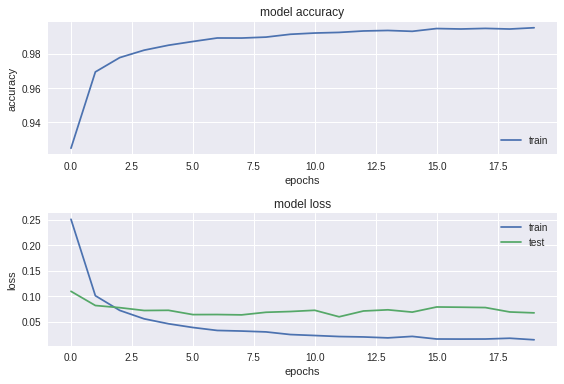

In [0]:
#we can now start the training processand saving matrics

history=model.fit(X_train,Y_train,batch_size=128,epochs=20,verbose=2,validation_data=(X_test,Y_test))

#saving the model

save_dir="/content/drive/My Drive/AI/"
model_name ='keras_mnist.h5'
model_path=os.path.join(save_dir,model_name)
model.save(model_path)
print('Saved trained model as %s'%model_path)

#plotting the matrics

fig=plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper right')
plt.tight_layout()
fig

In [0]:
mnist_model=load_model("/content/drive/My Drive/AI/keras_mnist.h5")
loss_and_metrics=mnist_model.evaluate(X_test,Y_test,verbose=2)

print("Test loss",loss_and_metrics[0])
print("Test Accuracy",loss_and_metrics[1])

Test loss 0.06791062239217754
Test Accuracy 0.9848



9848 classified correctly
152 classified incorrect


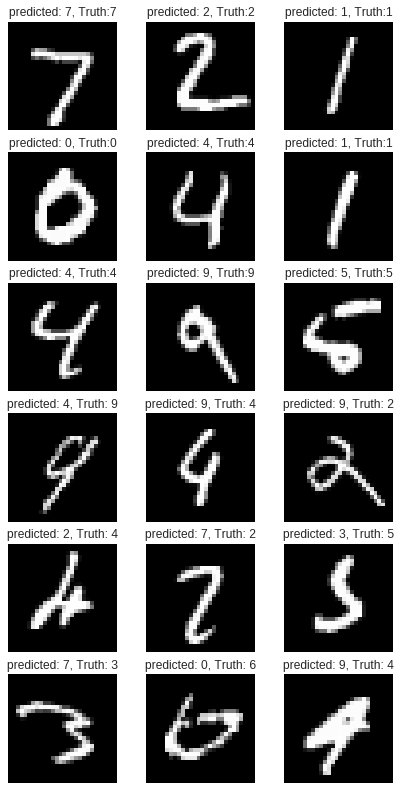

In [0]:
#load the model and create predictions

mnist_model=load_model("/content/drive/My Drive/AI/keras_mnist.h5")
predicted_classes=mnist_model.predict_classes(X_test)

#see which are predicted right and which not

correct_indices=np.nonzero(predicted_classes==y_test)[0]
incorrect_indices=np.nonzero(predicted_classes!=y_test)[0]
print()
print(len(correct_indices),"classified correctly")
print(len(incorrect_indices),"classified incorrect")

#adopt figure size to accomodate 18 plots

plt.rcParams['figure.figsize']=(7,14)
figure_evaluation=plt.figure()

#plot 9 correctly predictions
for i,correct in enumerate(correct_indices[:9]):
  plt.subplot(6,3,i+1)
  plt.imshow(X_test[correct].reshape(28,28),cmap='gray',interpolation='none')
  plt.title("predicted: {}, Truth:{}".format(predicted_classes[correct],y_test[correct]))
  plt.xticks([])
  plt.yticks([])
for i,incorrect in enumerate(incorrect_indices[:9]):
  plt.subplot(6,3,i+10)
  plt.imshow(X_test[incorrect].reshape(28,28),cmap='gray',interpolation='none')
  plt.title("predicted: {}, Truth: {}".format(predicted_classes[incorrect],y_test[incorrect]))
  plt.xticks([])
  plt.yticks([])
figure_evaluation